In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
#import xgboost as xgb

In [2]:
data = pd.read_csv('../data/data_numerical.csv')

In [3]:
data.head()

,RP,C,SP,FD,Avg_Team_G,Avg_Team_Career_Length,Avg_Team_Stay_Length,Career_Length,Stay_Length,GS,Inn,playerid,G,Team,Season,Leave
0,0,0,0,1,97.080000,2.680000,1.880000,4,2,0,765.2,1,266,13,2007,0.0
1,0,0,0,1,118.173913,3.304348,2.000000,5,3,0,655.2,1,375,13,2008,0.0
2,0,0,0,1,112.086957,2.086957,1.434783,3,1,0,656.0,1,264,13,2006,0.0
3,0,0,0,1,103.666667,1.703704,1.666667,1,1,0,287.1,1,74,0,2003,0.0
4,0,0,0,1,105.958333,2.958333,2.041667,6,4,0,81.1,1,27,13,2009,1.0


In [4]:
X = data.drop(['Leave', 'playerid', 'Team'], axis=1)
X.drop(data[data.Season==2017].index, inplace=True)
y = data['Leave']
y.drop(data[data.Season==2017].index, inplace=True)


In [5]:
X.head()

,RP,C,SP,FD,Avg_Team_G,Avg_Team_Career_Length,Avg_Team_Stay_Length,Career_Length,Stay_Length,GS,Inn,G,Season
0,0,0,0,1,97.080000,2.680000,1.880000,4,2,0,765.2,266,2007
1,0,0,0,1,118.173913,3.304348,2.000000,5,3,0,655.2,375,2008
2,0,0,0,1,112.086957,2.086957,1.434783,3,1,0,656.0,264,2006
3,0,0,0,1,103.666667,1.703704,1.666667,1,1,0,287.1,74,2003
4,0,0,0,1,105.958333,2.958333,2.041667,6,4,0,81.1,27,2009


In [6]:
train_mask = (X.Season > 2006)&(X.Season < 2015)
test_mask = (X.Season >= 2015)
X_train = X[train_mask]
X_test = X[test_mask]
y_train =y[train_mask]
y_test = y[test_mask]

In [7]:
#xmodel = xgb.XGBClassifier()
#xmodel.fit(X_train, y_train)

In [8]:
#accuracy_score(y_test, xmodel.predict(X_test))

In [9]:
#xmodel.predict(X_test)

In [10]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [11]:
accuracy_score(y_test, et.predict(X_test))

0.64064697609001409

# Multi model stuff

In [12]:
#data_multi = pd.read_csv('../data/hayden_cleaned_data.csv')

In [13]:
#team_names = data_multi.target.unique()
#id_team = {names:i for i,names in enumerate (team_names)}
#data_multi.target = data_multi.target.apply(lambda x : id_team[x])

In [14]:
#X = data.drop(['Leave', 'playerid','Team'], axis=1)
#X.drop(data[data.Season==2017].index, inplace=True)
u = data['Team']
u.drop(data[data.Season==2017].index, inplace=True)

In [15]:
train_mask = (X.Season > 2006)&(X.Season < 2015)
test_mask = (X.Season >= 2015)
X_train = X[train_mask]
X_test = X[test_mask]
u_train =u[train_mask]
u_test = u[test_mask]


In [16]:
from keras.utils import np_utils

Using TensorFlow backend.


In [17]:
#mask_retire = (data.target == 0)
#data_noretire = data[~mask_retire]
#mask_gs = (data.G >= 1)
#data_noretire = (data[mask_gs])
#mask_length = (data_leave.Stay_Length >= 2)
#data_noretire = (data_leave[mask_length])
#data_noretire

In [18]:
#X = data[['SP','RP','FD','C','Stay_Length', 'Career_Length', 'GS', 'G', 'Inn']]#list(p.Team.unique())+


#y = data[['Diamondbacks','Royals','Dodgers','Phillies','Brewers','Cubs','Tigers','Giants','Red Sox','Indians','Twins','Blue Jays','White Sox','Padres','Cardinals','Mets','Braves','Expos','Rockies','Marlins','Astros','Nationals','Yankees','Mariners','Angels','Athletics','Reds','Pirates','Rays','Orioles','Rangers','Devil Rays']]
#y = np_utils.to_categorical(data_noretire.target,33)
#u = data_noretire.target 

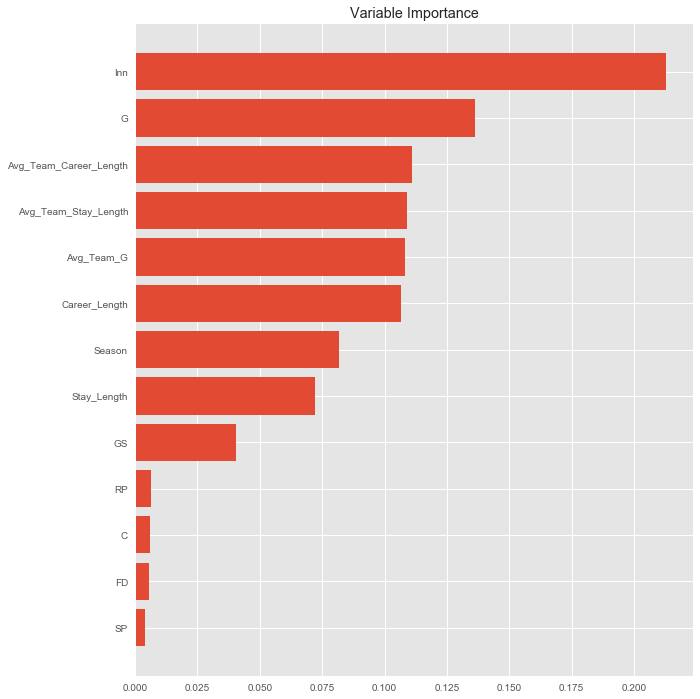

In [19]:
ind = np.argsort(et.feature_importances_)
plt.figure(figsize=(10,12))

plt.barh(range(len(et.feature_importances_)),et.feature_importances_[ind])
# It is very important that you use the same columns that you fit your model with, or else this will be wrong!
plt.yticks(range(len(et.feature_importances_)),X_train.columns[ind])
plt.title("Variable Importance")
plt.show()

In [40]:
et = ExtraTreesClassifier()
et.fit(X_train, u_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [41]:
accuracy_score(u_test, et.predict(X_test))

0.13009845288326302